In [1]:
import os
# If you are running this from ~/python_scripts/mycode.py
# change directory to the root of the repository
# All utils assume that the working directory is the root directory of the github folder
os.chdir('../')

import numpy as np
import pandas as pd
import networkx as nx


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 12, 'font.style': 'normal',  'font.family':'serif', 'figure.facecolor':'white'})

from utils.random_burning import random_burning
from utils.visualization import coarse_grained_visualization

In [2]:
# running on 
G = nx.karate_club_graph()

# run
r=2
Gg, nG_dict = random_burning(G, r)

In [3]:
def get_palette(hex_colors, N):
    rgba_colors =['#'+hc for hc in hex_colors ]
    color_palette = LinearSegmentedColormap.from_list('custom_palette', rgba_colors, N=N)
    color_list = [color_palette(i / (N - 1)) for i in range(N)]
    return color_list


hex_colors = ["ADD7F6", "00798C", "30638E", "031C29","FFE173", "edae49","ED784A","DA5C6D", "BB283C"] # reds
cols = get_palette(hex_colors, len(np.unique(list(nG_dict.values()))))
colors= dict(zip(np.unique(list(nG_dict.values())),cols))

G_colors = [ colors[nG_dict[node]] for node in G.nodes()]
Gg_colors = [ colors[node] for node in Gg.nodes()]

Text(0.5, 1.0, 'coarse-grained graph')

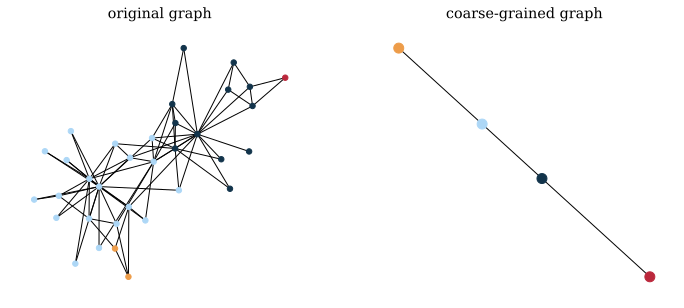

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
pos = nx.spring_layout(G)
nx.draw(G, with_labels=False, node_color=G_colors, node_size=30)
plt.title('original graph')


plt.subplot(122)
pos = nx.spring_layout(Gg)
nx.draw(Gg, with_labels=False, node_color=Gg_colors, node_size=100)
plt.title('coarse-grained graph')



In [5]:
import igraph as ig

iG= ig.Graph.from_networkx(G)
iGg=ig.Graph.from_networkx(Gg)
coarse_grained_visualization(g=iG,layout=None, g_cg= iGg, node_dict= nG_dict, figure_name='figures/random_burning.png' )